In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import country_converter as coco

In [2]:
df = pd.read_csv('../Data/FT1000.csv')
df.head(10)

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
5,6,MR Consulting,No,No,Germany,Waste management & recycling,343.52,13165586,150908,9,2,2017
6,7,Thriva,No,No,UK,Health,321.66,18732563,251668,57,12,2015
7,8,Exotec,No,No,France,Industrial Goods,306.86,47597000,706700,200,15,2015
8,9,Winelivery,No,No,Italy,Ecommerce,303.73,7337290,111500,10,1,2015
9,10,Instabox,No,No,Sweden,Technology,299.73,24484879,392055,117,5,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   Ranked2021     1000 non-null   object 
 3   Ranked2020     1000 non-null   object 
 4   Country        1000 non-null   object 
 5   Sector         1000 non-null   object 
 6   CAGR           1000 non-null   float64
 7   Revenue2020    1000 non-null   int64  
 8   Revenue2017    1000 non-null   int64  
 9   Employees2020  1000 non-null   int64  
 10  Employees2017  1000 non-null   int64  
 11  FoundingYear   1000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.9+ KB


In [4]:
df.describe()

,Rank,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,78.881950,2.034009e+07,4.005901e+06,79.948000,26.480000,2011.275000
std,288.819436,52.471399,7.771805e+07,9.207763e+06,161.448155,63.526161,7.665516
min,1.000000,36.550000,1.507867e+06,1.007110e+05,1.000000,0.000000,1898.000000
25%,250.750000,46.582500,3.186724e+06,6.283870e+05,14.000000,4.000000,2010.000000
50%,500.500000,61.105000,6.361154e+06,1.271956e+06,30.000000,10.000000,2013.000000
75%,750.250000,93.522500,1.662410e+07,3.549436e+06,70.000000,23.000000,2015.000000
max,1000.000000,477.430000,2.120072e+09,1.453982e+08,1798.000000,767.000000,2017.000000


In [5]:
df.isnull().sum()

Rank             0
Name             0
Ranked2021       0
Ranked2020       0
Country          0
Sector           0
CAGR             0
Revenue2020      0
Revenue2017      0
Employees2020    0
Employees2017    0
FoundingYear     0
dtype: int64

In [6]:
df.duplicated().sum()

0

# TOP 10 COMMON COUNTRIES

In [7]:
Country = df['Country'].value_counts().nlargest(10)
print('Top 10 Common Country')
print(Country)

fig = px.bar(x=Country.index, y=Country.values,color = Country.index)
fig.update_layout(title = 'Top 10 Common Country', xaxis_title = 'Country', yaxis_title='Total Count')
fig.show()

Top 10 Common Country
Country
Italy              235
Germany            194
UK                 155
France             147
Spain               49
Poland              34
Sweden              28
The Netherlands     19
Hungary             13
Czech Republic      11
Name: count, dtype: int64


# SECTOR


In [8]:
df['Country'] = coco.convert(names=df['Country'], to='ISO3')

Country = df['Country'].value_counts()
fig = px.choropleth(locations=Country.index, color=Country.values, template='plotly_dark')

fig.update_layout(title = 'Company Location Distribution Map')
fig.show()

In [9]:
Sector = df['Sector'].value_counts()
print('Fastest Growing Industries Counts')
print(Sector)

fig = px.pie(df, values=Sector.values, names=Sector.index, title='Fastest Growing Industries')
fig.show()

Fastest Growing Industries Counts
Sector
Technology                      209
Construction                     89
Retail                           86
Ecommerce                        65
Support Services                 56
Health                           43
Energy                           42
Industrial Goods                 36
Advertising                      33
Transport                        28
Financial Services               28
Fintech                          26
Automobiles                      26
Property                         26
Management Consulting            22
Telecoms                         20
Food & Beverage                  20
Education                        15
Interiors                        12
Waste management & recycling     12
Media                            11
Sales & Marketing                10
Personal & Household Goods       10
Cyber Security                   10
Fashion                          10
Chemicals & Pharmaceuticals       8
Travel & Leisure       

# FOUNDING YEAR

FoundingYear
2016    159
2015    122
2013    116
2014    105
2012     88
2010     68
2017     65
2011     65
2009     40
2008     24
2007     22
2006     16
2005     13
2003     13
2004     11
2001     10
2000      9
2002      9
1999      8
1996      6
1994      4
1984      3
1993      3
1998      2
1997      2
1938      1
1992      1
1991      1
1977      1
1995      1
1956      1
1975      1
1965      1
1990      1
1983      1
1952      1
1979      1
1986      1
1982      1
1976      1
1989      1
1898      1
Name: count, dtype: int64


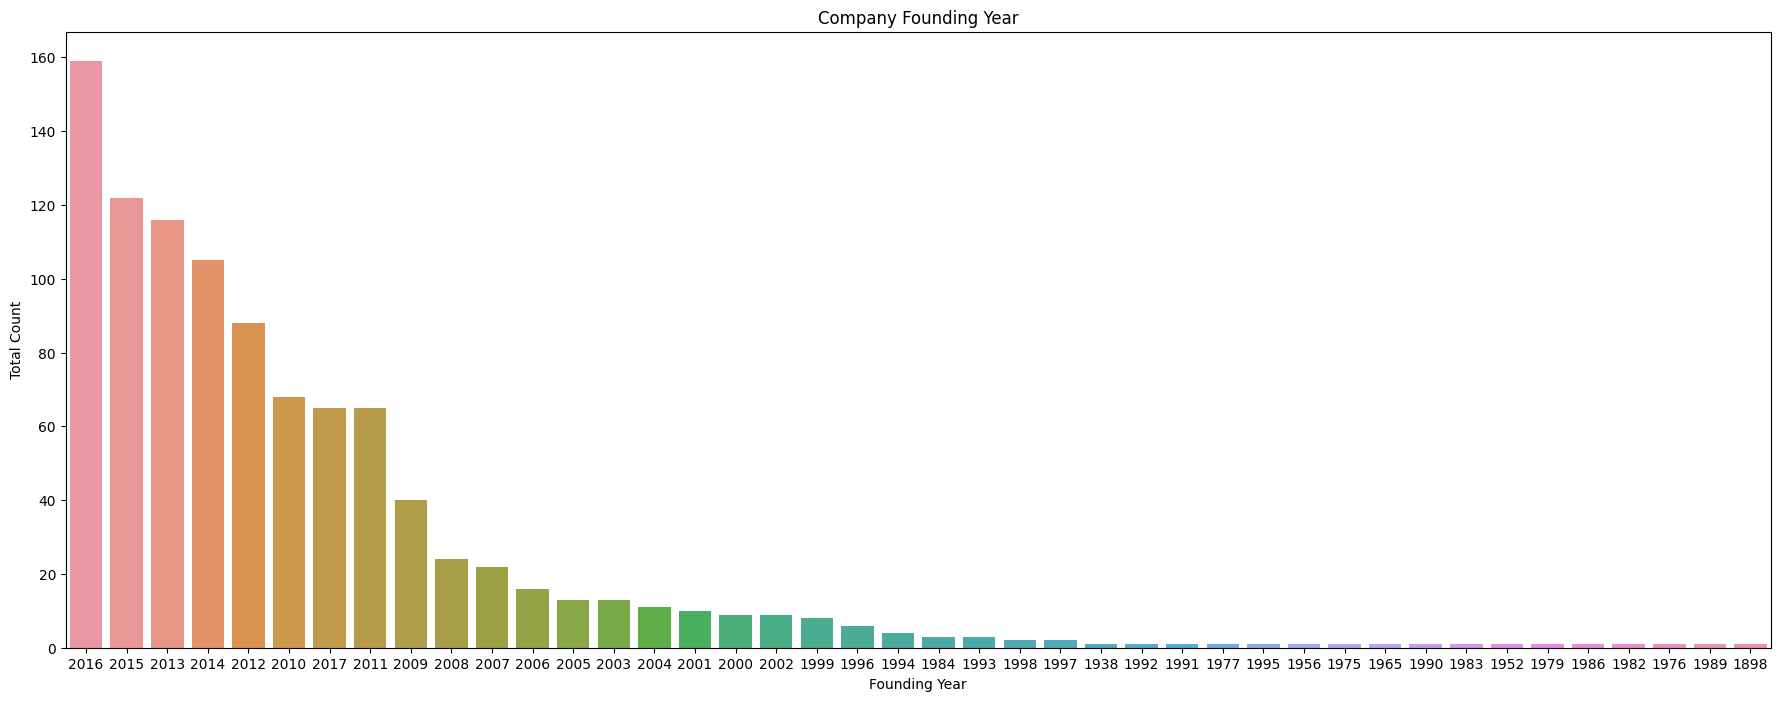

In [10]:
Year = df['FoundingYear'].value_counts()
print(Year)

plt.figure(figsize=(22,8))
sns.countplot(x=df['FoundingYear'], order=Year.index)
plt.title('Company Founding Year')
plt.ylabel('Total Count')
plt.xlabel('Founding Year')
plt.show()

# Revenue increment from Year 17 to Year 20 by Country

Country
GBR    6061086759
DEU    1954903977
ITA    1658658195
FRA    1562266281
ESP    1272535294
POL     778328276
SWE     559035928
FIN     348636545
EST     291065067
NOR     275465010
LTU     260715437
LUX     203160285
NLD     164504134
LVA     117261759
CZE     104096623
ROU      84257549
CHE      82270743
HUN      77545781
LIE      73140482
AUT      69412013
BEL      53234536
DNK      52701378
CYP      48725594
GRC      38761668
BGR      35840350
HRV      30793700
SVK      25415950
PRT      23061758
IRL      20711122
SVN       6598594
Name: RevenueDiff, dtype: int64


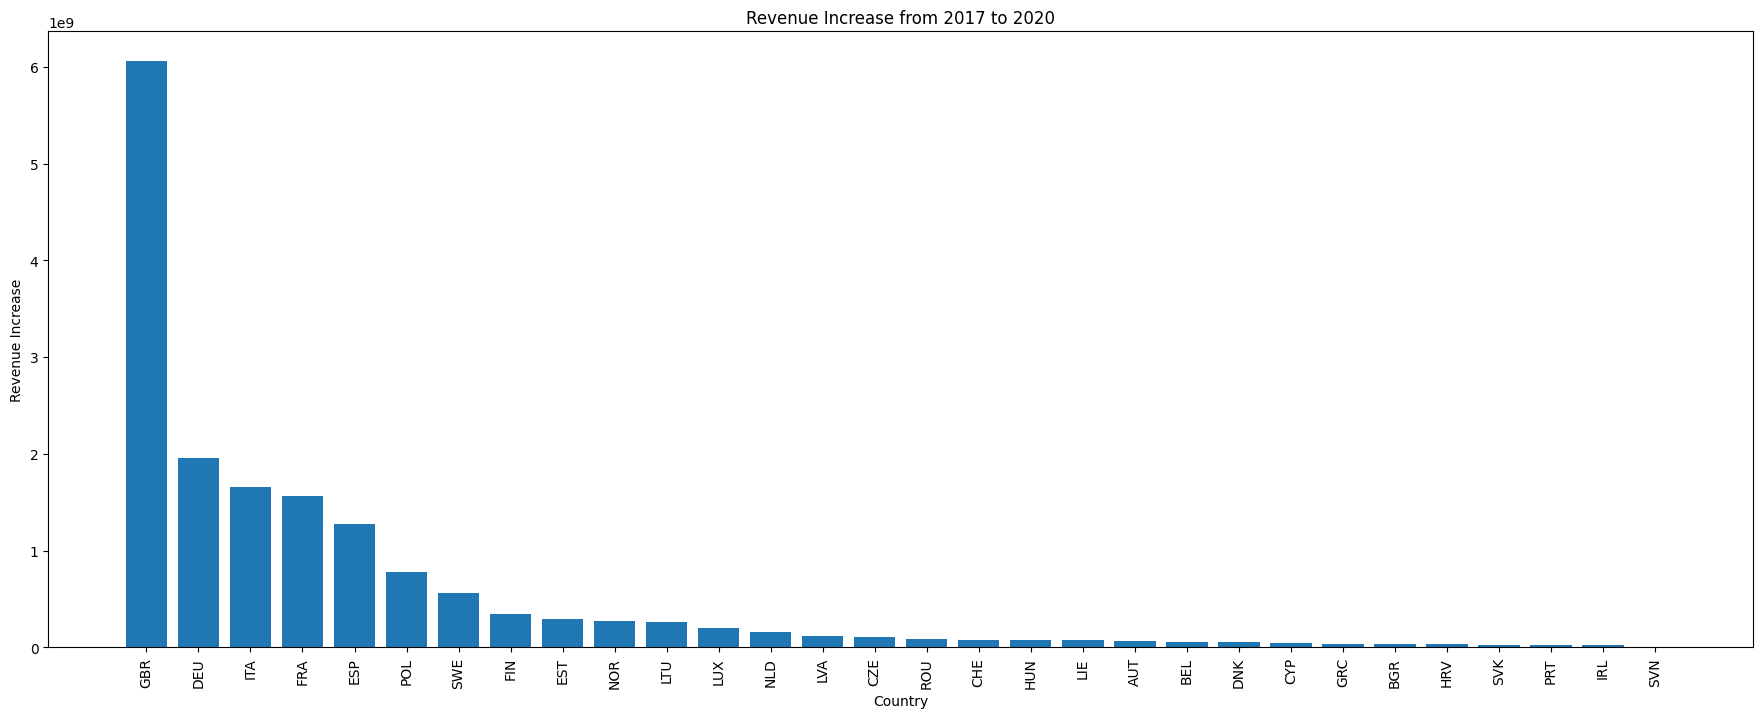

In [11]:
RevenueIncre = df.groupby('Country').aggregate({'Revenue2017': 'sum', 'Revenue2020': 'sum'})
RevenueIncre['RevenueDiff'] = RevenueIncre['Revenue2020'] - RevenueIncre['Revenue2017']
sorted_revenue = RevenueIncre['RevenueDiff'].sort_values(ascending=False)
print(sorted_revenue)

plt.figure(figsize=(22,8))
plt.bar(sorted_revenue.index, sorted_revenue)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Revenue Increase')
plt.title('Revenue Increase from 2017 to 2020')
plt.show()

# Increment of employees from Year 2017 to Year 2020 by Country

Country
GBR    13986
ITA     7700
DEU     6874
FRA     5677
POL     4039
ESP     3505
LTU     1807
SWE     1732
EST     1431
NLD      719
LVA      710
NOR      662
FIN      643
BEL      537
BGR      503
ROU      462
DNK      352
LIE      346
HUN      302
CHE      257
AUT      237
CZE      227
CYP      190
HRV      162
GRC      142
PRT       90
SVK       75
IRL       64
SVN       19
LUX       18
Name: Dif, dtype: int64


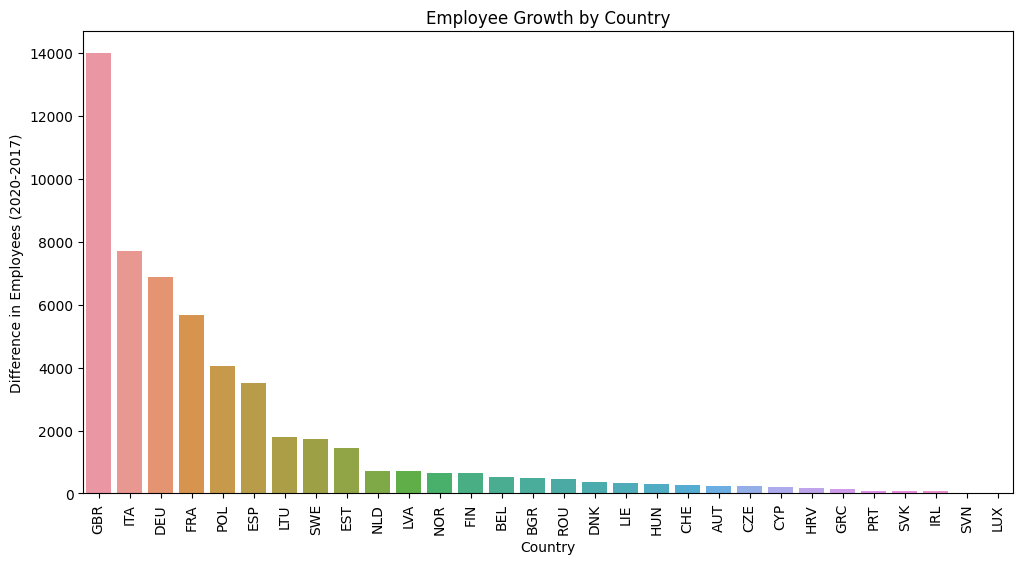

In [12]:
IncrementEmp = df.groupby('Country').aggregate({'Employees2017':'sum', 'Employees2020':'sum'})
IncrementEmp['Dif'] = IncrementEmp['Employees2020'] - IncrementEmp['Employees2017']
Sort_DifEmp = IncrementEmp['Dif'].sort_values(ascending=False)
print(Sort_DifEmp)

plt.figure(figsize=(12,6))
sns.barplot(x=Sort_DifEmp.index, y=Sort_DifEmp.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Difference in Employees (2020-2017)')
plt.title('Employee Growth by Country')
plt.show()

In [ ]:
data.shape